<a href="https://colab.research.google.com/github/poolGolez/tf-playground/blob/main/udacity/Udacity_Exercise_02%5D_Classification_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.9MB 29.3MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
dataset,metadata=tfds.load('fashion_mnist', as_supervised=True, with_info=True)
dataset_train, dataset_test=dataset['train'],dataset['test']

CLASSES=metadata.features['label'].names

def normalize(image,label):
  image = tf.cast(image, tf.float32)
  image /= 255
  print(image.shape)
  return image, label

dataset_train = dataset_train.map(normalize).cache()
dataset_test = dataset_test.map(normalize).cache()

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
(28, 28, 1)
(28, 28, 1)


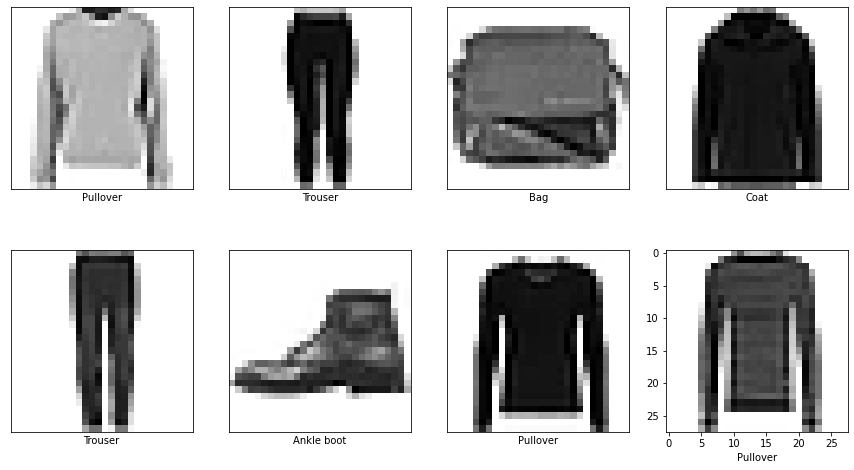

In [ ]:
plt.figure(figsize=(15,35))
index=1
for image, label in dataset_train.take(8):
  plt.xticks([])
  plt.yticks([])

  plt.subplot(8,4, index)
  plt.imshow(image.numpy().reshape((28,28)), cmap=plt.cm.binary)
  plt.xlabel(CLASSES[label.numpy()])

  index+=1

# Build the model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28,1)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]);
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
BATCH_SIZE=32
df_train_count = metadata.splits['train'].num_examples
df_train = dataset_train.cache().repeat().shuffle(df_train_count).batch(BATCH_SIZE)
df_train

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

#Train the Model

In [ ]:
model.fit(df_train, epochs=5, steps_per_epoch=math.ceil(df_train_count/32))

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.6277 - accuracy: 0.7808
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3954 - accuracy: 0.8580
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3451 - accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3228 - accuracy: 0.8813
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2914 - accuracy: 0.8914


# Evaluate the Model

In [ ]:
df_test_count = metadata.splits['test'].num_examples
df_test = dataset_test.cache().shuffle(df_test_count).batch(BATCH_SIZE)
df_test

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
loss, accuracy = model.evaluate(df_test, steps=math.ceil(df_test_count/BATCH_SIZE))

313/313 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8762


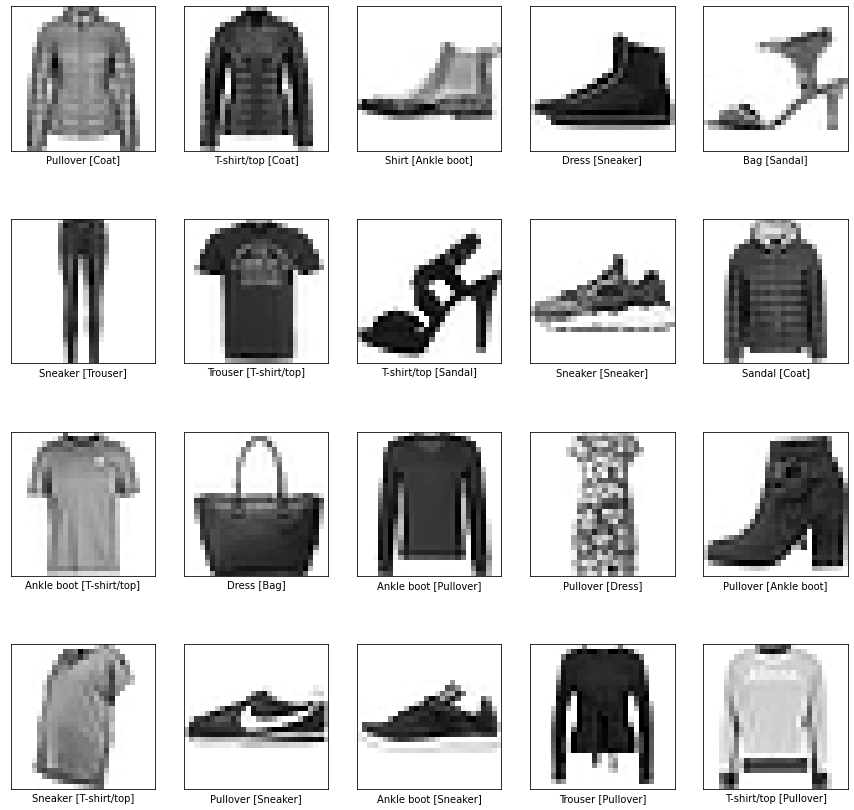

In [ ]:
predictions = [CLASSES[np.argmax(probabilities)] for probabilities in model.predict(df_test)]

plt.figure(figsize=(15,15))
index=1
for (image, label_id), prediction in list(zip(dataset_test, predictions))[:20]:
  label = CLASSES[label_id.numpy()]
  plt.subplot(4,5,index)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image.numpy().reshape((28,28)), cmap=plt.cm.binary)

  plt.xlabel(f"{prediction} [{label}]")
  index+=1